## Лабораторная работа №1. Машинное обучение.

Выполнил: Ноздрин В.Я. группа 9383



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

from scipy.stats import norm
import seaborn as sb

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df = df.drop(columns = [
    'anaemia',
    'diabetes',
    'high_blood_pressure',
    'sex',
    'smoking',
    'time',
    'DEATH_EVENT'
])
df

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,75.0,582,20,265000.00,1.9,130
1,55.0,7861,38,263358.03,1.1,136
2,65.0,146,20,162000.00,1.3,129
3,50.0,111,20,210000.00,1.9,137
4,65.0,160,20,327000.00,2.7,116
...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143
295,55.0,1820,38,270000.00,1.2,139
296,45.0,2060,60,742000.00,0.8,138
297,45.0,2413,38,140000.00,1.4,140


In [84]:
def make_hist(data, n_bins=20):
    fig, axs = plt.subplots(2,3)
    axs[0, 0].hist(data[:,0], bins = n_bins)
    axs[0, 0].set_title('age')
    axs[0, 1].hist(data[:,1], bins = n_bins)
    axs[0, 1].set_title('creatinine_phosphokinase')
    axs[0, 2].hist(data[:,2], bins = n_bins)
    axs[0, 2].set_title('ejection_fraction')
    axs[1, 0].hist(data[:,3], bins = n_bins)
    axs[1, 0].set_title('platelets')
    axs[1, 1].hist(data[:,4], bins = n_bins)
    axs[1, 1].set_title('serum_creatinine')
    axs[1, 2].hist(data[:,5], bins = n_bins)
    axs[1, 2].set_title('serum_sodium')
    plt.show()

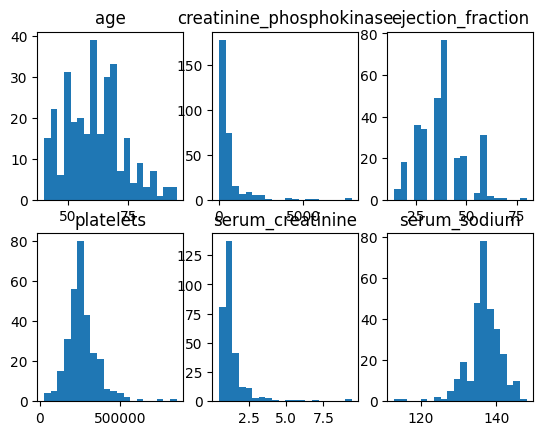

In [22]:
n_bins = 20

fig, axs = plt.subplots(2,3)

axs[0, 0].hist(df['age'].values, bins = n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(df['creatinine_phosphokinase'].values, bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(df['ejection_fraction'].values, bins = n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(df['platelets'].values, bins = n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(df['serum_creatinine'].values, bins = n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(df['serum_sodium'].values, bins = n_bins)
axs[1, 2].set_title('serum_sodium')

plt.show()

### Диапазоны значений для каждого из признаков

$age\in[40,95]\ \ \ \ arg\ max(\#)=60, \\
creatinine\_phosphokinase\in[23,7861]\ \ \ \ arg\ max(\#)=23, \\
ejection\_fraction\in[14,80]\ \ \ \ arg\ max(\#)=35, \\
platelets\in[25100,850000]\ \ \ \ arg\ max(\#)=250000, \\
serum\_creatinine\in[0.5,9.4]\ \ \ \ arg\ max(\#)=1.5, \\
serum\_sodium\in[113,148]\ \ \ \ arg\ max(\#)=137$

In [41]:
data = df.to_numpy(dtype='float')

## Стандартизация данных

In [61]:
scaler = preprocessing.StandardScaler().fit(data[:150,:])
data_scaled = scaler.transform(data[:150,:])

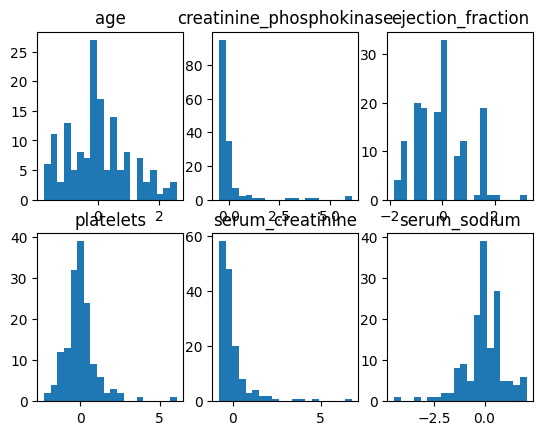

In [62]:
fig, axs = plt.subplots(2,3)
axs[0, 0].hist(data_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
plt.show()

Гистограммы по форме изменились не сильно, но наибольшее количество наблюдений теперь достигается в нуле, а также область определения нормирована. Эти изменения - результат работы функции `scaler.fit` и `scaler.transform`.

In [63]:
# mean and var 
df.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000


In [64]:
df_scaled = pd.DataFrame(data_scaled)
df_scaled.describe()

,0,1,2,3,4,5
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,1.302662e-16,2.368476e-17,1.184238e-16,8.881784e-17,-1.302662e-16,-3.067176e-15
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.762815e+00,-4.909911e-01,-1.836497e+00,-2.284465e+00,-7.892551e-01,-4.505552e+00
25%,-7.587815e-01,-4.168154e-01,-6.094388e-01,-5.249590e-01,-4.463244e-01,-5.404313e-01
50%,-2.366841e-01,-3.027152e-01,4.090193e-03,-3.708980e-02,-2.920055e-01,1.204222e-01
75%,5.665426e-01,-2.114182e-02,5.409281e-01,3.872810e-01,1.538044e-01,7.262046e-01
max,2.574609e+00,6.096985e+00,3.225117e+00,6.063441e+00,6.755221e+00,2.102983e+00


Для всех критериев формула $x_{scaled} = (x-E_x)/D_x$, где $E_x$ - мат.ожидание $x$, а $D_x$ - СКО $x$

In [65]:
print(f"{scaler.mean_ = }\n{scaler.var_ = }")

scaler.mean_ = array([6.29466667e+01, 6.07153333e+02, 3.79466667e+01, 2.66746749e+05,
       1.52060000e+00, 1.36453333e+02])
scaler.var_ = array([1.54997156e+02, 1.41548882e+06, 1.70023822e+02, 9.25286050e+09,
       1.36052697e+00, 2.06078222e+01])


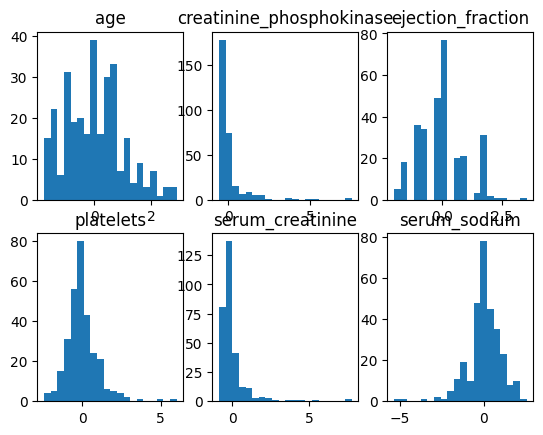

In [66]:
scaler = preprocessing.StandardScaler()
data_scaled = scaler.fit_transform(data)

fig, axs = plt.subplots(2,3)
axs[0, 0].hist(data_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
plt.show()

In [67]:
df_scaled = pd.DataFrame(data_scaled)
df_scaled.describe()

,0,1,2,3,4,5
count,2.990000e+02,299.000000,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02
mean,5.703353e-16,0.000000,-3.267546e-17,7.723291e-17,1.425838e-16,-8.673849e-16
std,1.001676e+00,1.001676,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00
min,-1.754448e+00,-0.576918,-2.038387e+00,-2.440155e+00,-8.655094e-01,-5.363206e+00
25%,-8.281242e-01,-0.480393,-6.841802e-01,-5.208700e-01,-4.782047e-01,-5.959961e-01
50%,-7.022315e-02,-0.342574,-7.076750e-03,-1.390846e-02,-2.845524e-01,8.503384e-02
75%,7.718891e-01,0.000166,5.853888e-01,4.111199e-01,5.926150e-03,7.660638e-01
max,2.877170e+00,7.514640,3.547716e+00,6.008180e+00,7.752020e+00,2.582144e+00


## Приведение к диапазону

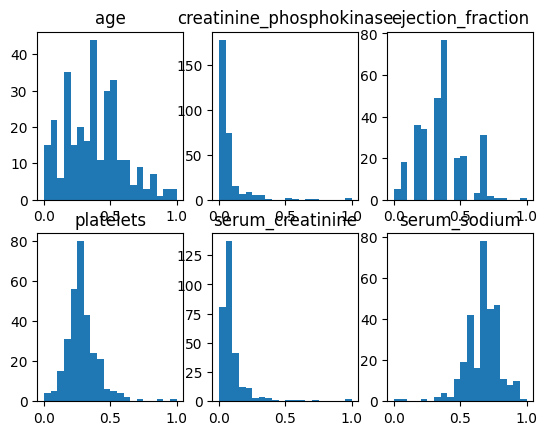

In [88]:
min_max_scaler = preprocessing.MinMaxScaler().fit(data)
data_min_max_scaled = min_max_scaler.transform(data)
make_hist(data_min_max_scaled)

Форма гистограмм не изменилась, но теперь область определения $[0,1]$

In [78]:
list(map(lambda x, y, z: print(f'min = {x}\tmax = {y}\trange = {z}'), min_max_scaler.data_min_, min_max_scaler.data_max_, min_max_scaler.data_range_))

min = 40.0	max = 95.0	range = 55.0
min = 23.0	max = 7861.0	range = 7838.0
min = 14.0	max = 80.0	range = 66.0
min = 25100.0	max = 850000.0	range = 824900.0
min = 0.5	max = 9.4	range = 8.9
min = 113.0	max = 148.0	range = 35.0


[None, None, None, None, None, None]

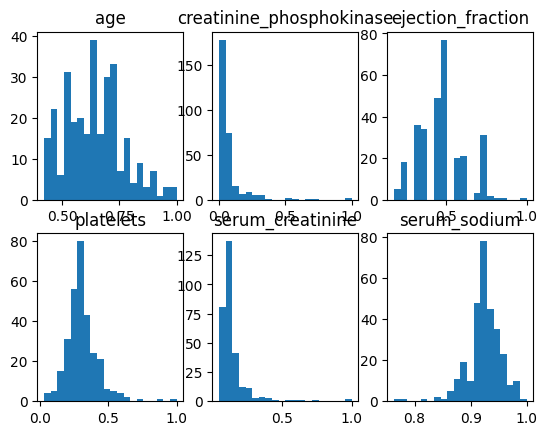

In [87]:
max_abs_scaler = preprocessing.MaxAbsScaler().fit(data)
data_max_abs_scaled = max_abs_scaler.transform(data)
make_hist(data_max_abs_scaled)

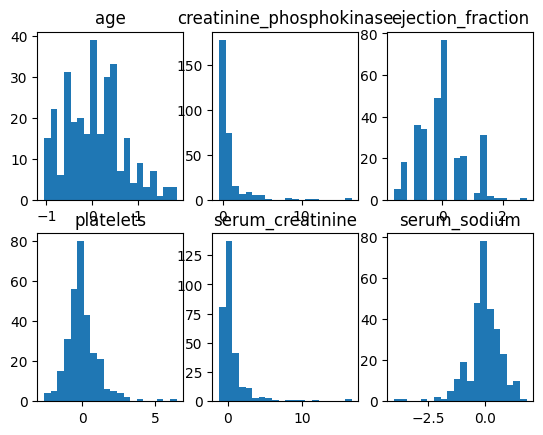

In [89]:
robust_scaler = preprocessing.RobustScaler().fit(data)
data_robust_scaled = robust_scaler.transform(data)
make_hist(data_robust_scaled)

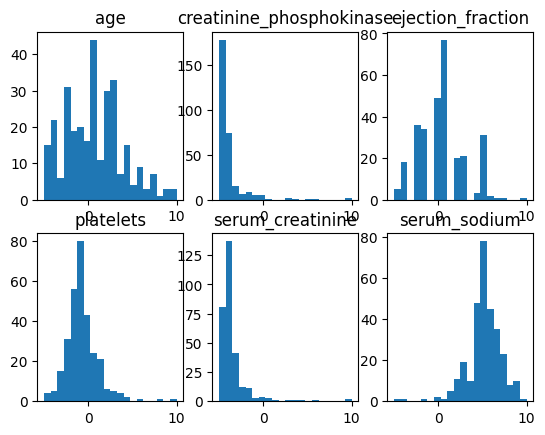

In [112]:
# task_scaler
task_scaler = preprocessing.MinMaxScaler(feature_range=(-5, 10)).fit(data)
data_task_scaled = task_scaler.fit_transform(data)
make_hist(data_task_scaled)

## Нелинейные преобразования

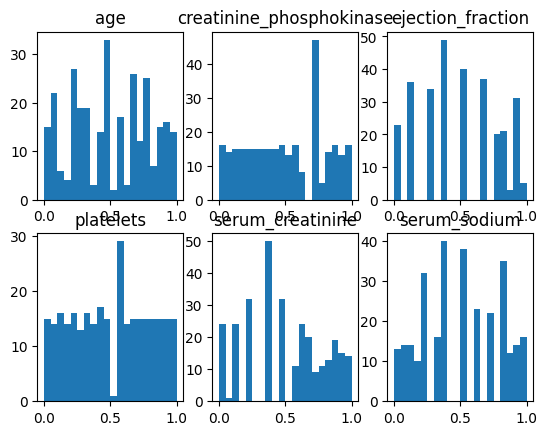

In [113]:
quantile_transformer = preprocessing.QuantileTransformer(n_quantiles=100, random_state=0
                                                        ).fit(data)
data_quantile_scaled = quantile_transformer.transform(data)
make_hist(data_quantile_scaled)

## Задание 1  

Предположим X и Y две случайные переменные отражающие возраст и вес, соответственно. Рассмотрим случайную выборку из 20 наблюдений  

X = \[69, 74, 68, 70, 72, 67, 66, 70, 76, 68, 72, 79, 74, 67, 66, 71, 74, 75, 75, 76\]
Y = \[153, 175, 155, 135, 172, 150, 115, 137, 200, 130, 140, 265, 185, 112, 140,  150, 165, 185, 210, 220\]

Необходимо:
1. **Найти среднее, медиану и моду величины X**
2. **Найти дисперсию Y**
3. **Построить график нормального распределения для X**
4. Найти вероятность того, что возраст больше 80
5. Найти двумерное мат. ожидания и ковариационную матрицу для этих двух величин
6. Определять корреляцию между X и Y
7. **Построить диаграмму рассеяния, отображающая зависимость между возрастом и весом**


1. **Найти среднее, медиану и моду величины X**

|  | Среднее | Медиана | Мода |
| --- | --- | --- | --- |
| X | 71.45 | 71.5 | 74.0 |

In [7]:
print(f"mean\n{df.mean()}\n\nmedian\n{df.median()}\n\nmode\n{df.mode()}")

mean
age                             60.833893
creatinine_phosphokinase       581.839465
ejection_fraction               38.083612
platelets                   263358.029264
serum_creatinine                 1.393880
serum_sodium                   136.625418
dtype: float64

median
age                             60.0
creatinine_phosphokinase       250.0
ejection_fraction               38.0
platelets                   262000.0
serum_creatinine                 1.1
serum_sodium                   137.0
dtype: float64

mode
    age  creatinine_phosphokinase  ejection_fraction  platelets  \
0  60.0                       582                 35  263358.03   

   serum_creatinine  serum_sodium  
0               1.0           136  


2. **Найти дисперсию Y**

**Дисперсия Y 1441.273684**

In [8]:
print(f"Variance\n{df.var()}")

Variance
age                         1.414865e+02
creatinine_phosphokinase    9.414586e+05
ejection_fraction           1.400635e+02
platelets                   9.565669e+09
serum_creatinine            1.070211e+00
serum_sodium                1.946996e+01
dtype: float64



## Задание 2  

Для следующего набора данных


|  | X1 | X2 | X3 |
| :---: | :----: | :---: | :---: |
| a | 17 | 17 | 12 |
| b | 11 | 9 | 13 |
| c | 11 | 8 | 19 |

Рассчитайте ковариационную матрицу и обобщенную дисперсию

## Задание 3  

Даны два одномерных нормальных распределения $N_a$ и $N_b$ с мат. ожиданиями $4, 8$ и СКО $1, 2$ соответственно.

**Для каждого из значения ${5,6,7}$ определите какое из распределений сгенерировало значение с большей вероятностью.**

Найди значение, которой могло быть сгенерировано обеими распределениями с равной вероятностью

PDF: $$f_{\mu, \sigma}(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$$

In [46]:
import math
from scipy.optimize import fmin_powell

def f_x(mu, sigma):
    return lambda x: 1/(math.sqrt(2*math.pi*sigma**2)) * math.e**(-0.5*((x-mu)/sigma)**2)

na = f_x(4, 1)
nb = f_x(8, 2)
ndelta = lambda x: abs(na(x[0])-nb(x[0]))

print(fmin_powell(ndelta, np.array([5.66])))

for x in [5, 6, 7]:
    f_a = na(x)
    f_b = nb(x)
    print(f"x = {x}\tN_a:{f_a:f}\tN_b:{f_b:f}")

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 153
[5.65990966]
x = 5	N_a:0.241971	N_b:0.064759
x = 6	N_a:0.053991	N_b:0.120985
x = 7	N_a:0.004432	N_b:0.176033


![image](task3)

С равной вероятностью могло быть сгенерировано число 5.66